## 1. Importando bibliotecas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Preparando dados

In [8]:
url = 'https://raw.githubusercontent.com/robertferro/calculadora-aluguel-ml/main/3%20-%20%20EDA/dados_filtrados.csv'

In [9]:
dados = pd.read_csv(url, encoding='utf-8')

In [10]:
dados.head()

,bairro,zona,area,quartos,aluguel
0,Bela Vista,centro,86.0,2.0,2200
1,Bela Vista,centro,35.0,1.0,3200
2,Bela Vista,centro,35.0,1.0,3700
3,Bela Vista,centro,35.0,1.0,3700
4,Bela Vista,centro,25.0,1.0,1800


In [11]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1791.0,155.426019,104.096512,1.0,70.0,138.0,220.0,450.0
quartos,1791.0,2.600223,1.373281,1.0,2.0,3.0,3.0,12.0
aluguel,1791.0,4118.659408,3381.757181,450.0,1700.0,3000.0,5100.0,20000.0


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bairro   1791 non-null   object 
 1   zona     1791 non-null   object 
 2   area     1791 non-null   float64
 3   quartos  1791 non-null   float64
 4   aluguel  1791 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 70.1+ KB


 - Tratando variáveis categóricas.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
enconder = LabelEncoder()

In [15]:
dados['bairro'] = enconder.fit_transform(dados['bairro'])
dados['zona'] = enconder.fit_transform(dados['zona'])

<AxesSubplot:>

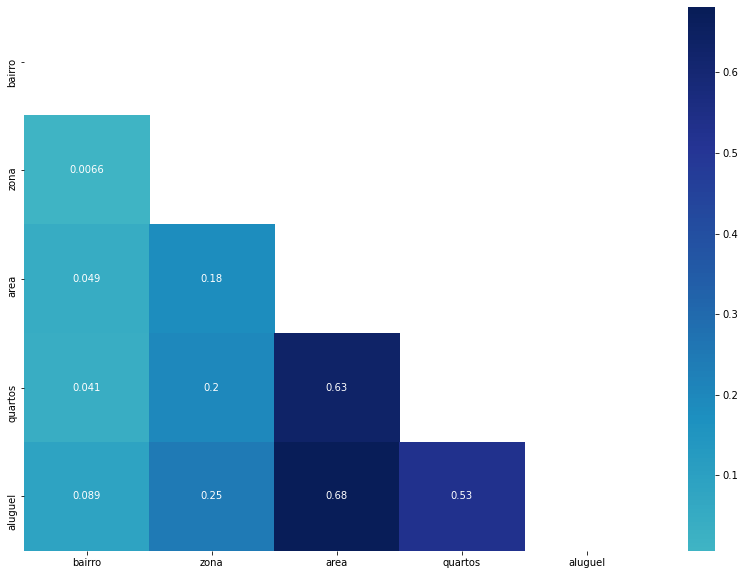

In [17]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))


sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

array([[<AxesSubplot:title={'center':'aluguel'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bairro'}>,
        <AxesSubplot:title={'center':'quartos'}>],
       [<AxesSubplot:title={'center':'zona'}>, <AxesSubplot:>]],
      dtype=object)

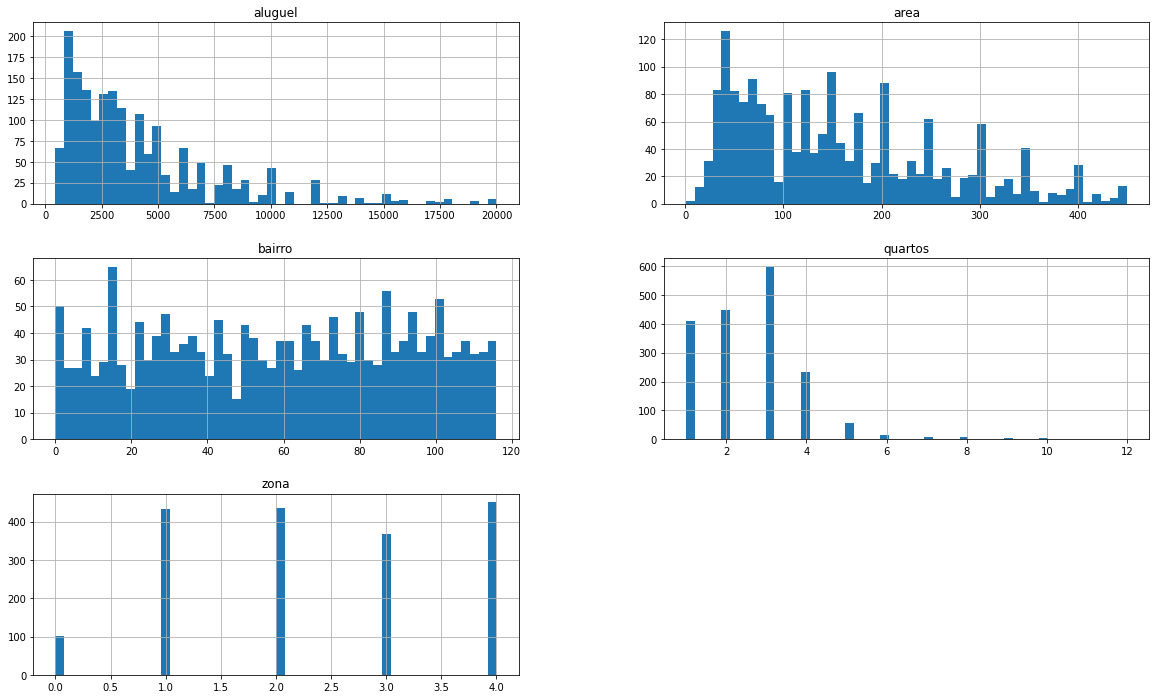

In [18]:
dados.hist(bins=50, figsize=(20,12))

 - Normalizando os dados.

In [19]:
dados['aluguel'] = dados['aluguel'].apply(np.log1p)
dados['area'] = dados['area'].apply(np.log1p)

 - Separando em treino e teste.

In [20]:
dados.columns

Index(['bairro', 'zona', 'area', 'quartos', 'aluguel'], dtype='object')

In [74]:
X = dados.drop('aluguel', axis=1)
Y = dados['aluguel']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.25, random_state=123, stratify=dados['bairro'])

## 2. Machine Learning
### 2.1 Definição de Métrica
Métricas para regressão:
- Mean Absolute Error
- Mean Squared Error
- R2 Score
- Root Mean Squared Error



### 2.2 Modelo Base

In [77]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_treino, Y_treino)

KNeighborsRegressor()

In [78]:
y_pred = neigh.predict(X_teste)

In [79]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-Y_teste.values)**2))

0.3962071194801512

In [80]:
# Mean Squared Error
np.mean((y_pred - Y_teste.values)**2)

0.15698008152675882

In [81]:
# Mean Absolute Error
np.mean(np.abs(y_pred - Y_teste.values))

0.2847944737634833

In [82]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(Y_teste, y_pred)

0.723979548063019

## 3. Triagem com Outros Modelos

In [83]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_treino, Y_treino)

reg.score(X_teste, Y_teste)

0.6571808223214645

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9887588505996993
Test score 0.5816055800004316
Treinando RandomForestRegressor
Train score 0.9559676349755833
Test score 0.7512685495870131
Treinando MLPRegressor
Train score 0.6539597377631586
Test score 0.7078760211647153
Treinando XGBRegressor
Train score 0.9666795696122312
Test score 0.7873534333758393


In [85]:
# Repetindo com validação cruzada
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=3)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score.mean())
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9887588505996993
Validation score 0.5499362894066727
Test score 0.5943265409680605
Treinando RandomForestRegressor
Train score 0.9539570221618643
Validation score 0.7122387923319105
Test score 0.7565146346131076
Treinando MLPRegressor
Train score 0.5997817956170197
Validation score 0.5546493243144743
Test score 0.6739920705374194
Treinando XGBRegressor
Train score 0.9666795696122312
Validation score 0.7206217975054097
Test score 0.7873534333758393


In [86]:
# TODO: Calibração de modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_treino, Y_treino)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [87]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [88]:
reg = gs.best_estimator_

In [89]:
train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=3)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score.mean())
print('Test score', test_score)

Train score 0.835218497363176
Validation score 0.7533853089229039
Test score 0.7902000765926479


In [91]:
X_teste

,bairro,zona,area,quartos
1080,62,4,4.025352,1.0
804,74,1,3.931826,1.0
843,59,1,4.025352,1.0
513,113,1,5.198497,3.0
1642,20,2,4.025352,1.0
...,...,...,...,...
1717,98,2,3.931826,1.0
1775,54,2,5.252273,3.0
250,31,3,4.867534,3.0
1153,105,4,3.713572,1.0


In [101]:
Y_teste.sort_values()

651     6.478510
652     6.552508
837     6.552508
1383    6.552508
839     6.552508
          ...   
1052    9.680406
926     9.741027
1011    9.770013
1244    9.798183
1051    9.798183
Name: aluguel, Length: 448, dtype: float64

In [97]:
X_teste.columns

Index(['bairro', 'zona', 'area', 'quartos'], dtype='object')

In [99]:
colunas = ['bairro', 'zona', 'area', 'quartos']
dados_entrada = [[62],[4],[4.025352],[1.0]]
dados_entrada = dict(zip(colunas, dados_entrada))
entrada = pd.DataFrame(dados_entrada)

reg.predict(entrada)

array([7.153167], dtype=float32)

In [109]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

## and later you can load it
#with open('filename.pkl', 'rb') as f:
#    clf = pickle.load(f)